In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv('../Data/data.csv')
print(data_df.shape)
data_df.head()

(569, 33)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
data_df.drop(['id'], axis=1, inplace=True)
print(data_df.shape)
data_df.head()

(569, 32)


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  Unnamed: 32  
0          0.4601                  0.11890          NaN  
1          0.2750                  0.08902          NaN  
2          0.3613                  0.08758          NaN  
3          0.6638                  0.17300          NaN  
4          0.2364                  0.07678          NaN  

[5 rows x 32 columns]

In [4]:
data_df['Unnamed: 32'].unique()

array([nan])

In [5]:
data_df.drop(['Unnamed: 32'], axis=1, inplace=True)
print(data_df.shape)

(569, 31)


In [6]:
print(f' Unique values for column, diagnosis: {data_df["diagnosis"].unique()}')

 Unique values for column, diagnosis: ['M' 'B']


In [7]:
data_df['diagnosis'] = data_df['diagnosis'].apply(lambda x: 0 if x=='M' else 1)

In [8]:
print(f' Unique values for column, diagnosis: {data_df["diagnosis"].unique()}')

 Unique values for column, diagnosis: [0 1]


In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
X = data_df.drop(['diagnosis'], axis = 1)
y = data_df['diagnosis']

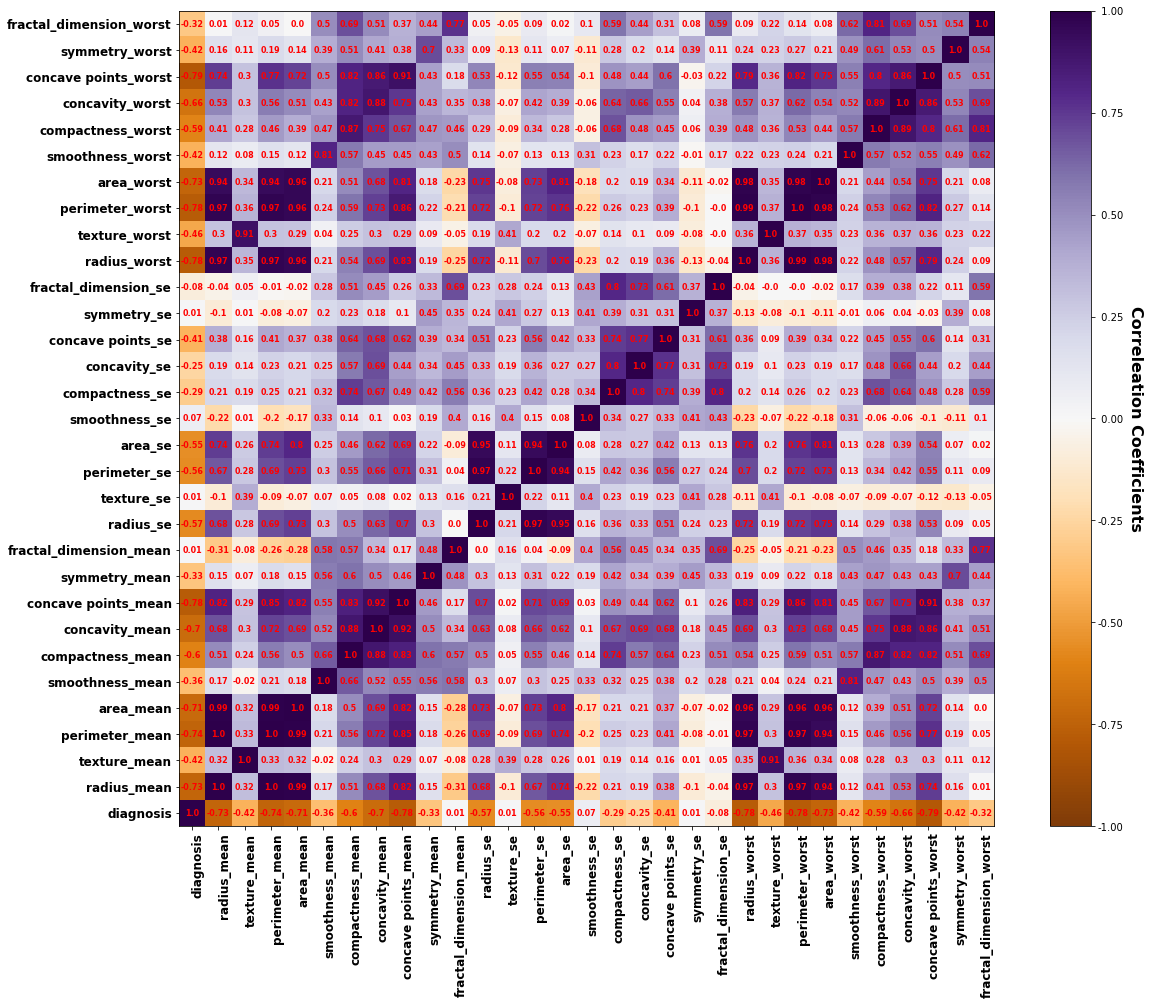

In [11]:
model_corr = data_df.corr(method='pearson')

corr_matrix_array = model_corr.to_numpy()
corr_matrix = np.around(corr_matrix_array, decimals=2)

predictors = data_df.columns.tolist()

fig, ax = plt.subplots(figsize=(20,15))
im = ax.imshow(corr_matrix, cmap='PuOr', origin='lower')
im.set_clim(-1, 1)
ax.grid(False)
ax.set_xticks(np.arange(len(predictors)))
ax.set_yticks(np.arange(len(predictors)))
ax.set_xticklabels(predictors, size=12, weight='bold')
ax.set_yticklabels(predictors, size=12, weight='bold')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right', rotation_mode='anchor')

for i in range(len(predictors)):
    for j in range(len(predictors)):
        text = ax.text(j, i, corr_matrix[i, j], ha='center', va='center', color='red', size=8, weight='bold')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
cbar.ax.set_ylabel('Correleation Coefficients', rotation=-90, va='bottom', size=16, weight='bold')
plt.show()

 0) area_worst                     0.191865
 1) radius_worst                   0.155025
 2) perimeter_worst                0.100479
 3) area_mean                      0.085239
 4) perimeter_mean                 0.080346
 5) area_se                        0.076767
 6) concave points_mean            0.069702
 7) compactness_worst              0.050662
 8) concave points_worst           0.042387
 9) concavity_worst                0.021551
10) smoothness_worst               0.020647
11) texture_mean                   0.017523
12) fractal_dimension_worst        0.010348
13) texture_worst                  0.009232
14) symmetry_worst                 0.007631
15) concavity_mean                 0.006451
16) radius_mean                    0.006209
17) radius_se                      0.005911
18) fractal_dimension_se           0.004877
19) perimeter_se                   0.004825
20) symmetry_se                    0.004817
21) smoothness_mean                0.004712
22) fractal_dimension_mean      

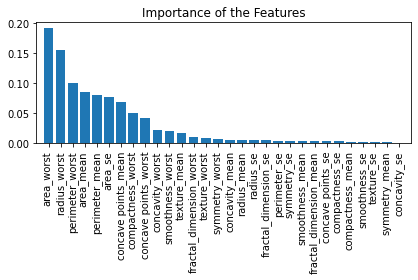

In [12]:
from sklearn.ensemble import RandomForestClassifier 
features_name = X.columns[0:32]
R_forest = RandomForestClassifier(n_estimators = 8, random_state = 25) 
R_forest.fit(X,y) 
importances = R_forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]): 
    print("%2d) %-*s %f" % (f,30,features_name[indices[f]],importances[indices[f]]))
plt.title('Importance of the Features') 
plt.bar(range(X.shape[1]),importances[indices],align = 'center')
plt.xticks(range(X.shape[1]),features_name[indices], rotation=90) 
plt.xlim([-1,X.shape[1]])
plt.tight_layout()
plt.show()

In [13]:
corr_cutoff = 0.70
top_corrs = list(data_df.corr()[(data_df.corr() > corr_cutoff) | (data_df.corr() <- corr_cutoff)].diagnosis.dropna().index)
top_corrs

['diagnosis',
 'radius_mean',
 'perimeter_mean',
 'area_mean',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [14]:
X = data_df[top_corrs].drop('diagnosis', axis=1)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
scaler.fit_transform(X)

array([[ 1.09706398,  1.26993369,  0.9843749 , ...,  2.30360062,
         2.00123749,  2.29607613],
       [ 1.82982061,  1.68595471,  1.90870825, ...,  1.53512599,
         1.89048899,  1.0870843 ],
       [ 1.57988811,  1.56650313,  1.55888363, ...,  1.34747521,
         1.45628455,  1.95500035],
       ...,
       [ 0.70228425,  0.67267578,  0.57795264, ...,  0.57900058,
         0.42790561,  0.41406869],
       [ 1.83834103,  1.98252415,  1.73521799, ...,  2.30360062,
         1.65317077,  2.28998549],
       [-1.80840125, -1.81438851, -1.34778924, ..., -1.43273495,
        -1.07581292, -1.74506282]])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=21)

Accuracy on training set: 92.46%
Accuracy on test set: 91.81%
[[ 55   9]
 [  5 102]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        64
           1       0.92      0.95      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



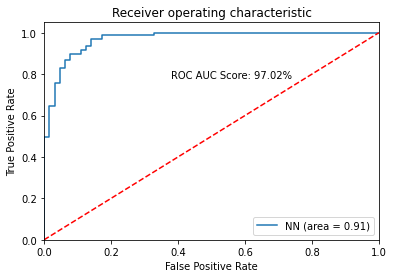

In [20]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes= 100, max_iter=1000, alpha=1, random_state=0)

mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2%}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2%}".format(mlp.score(X_test, y_test)))

# confusion matrix

y_pred = mlp.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# Precision/Recall

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# calculate ROC AUC Score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probabilities = mlp.predict_proba(X_test)
roc = roc_auc_score(y_test, probabilities[:, 1])
roc_percentage = "{:.02%}".format(roc)

NN_roc_auc = roc_auc_score(y_test, mlp.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NN (area = %0.2f)' % NN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.text(.38, .78, f"ROC AUC Score: {roc_percentage}")
plt.show()

In [22]:
import mlflow
from azureml.core import Workspace

In [23]:
ws = Workspace.from_config(_file_name='azure_east_mlws_config.json')

Note, we have launched a browser for you to login. For old experience with device code, use "az login --use-device-code"


Performing interactive authentication. Please follow the instructions on the terminal.
You have logged in. Now let us find all the subscriptions to which you have access...
Interactive authentication successfully completed.


In [26]:
mlflow.set_tracking_uri(ws.get_mlflow_tracking_uri())

In [27]:
experiment_name = 'Breast_Cancer_Experiment_with_MLFlow'

In [29]:
mlflow.set_experiment(experiment_name)

UnsupportedModelRegistryStoreURIException:  Model registry functionality is unavailable; got unsupported URI 'azureml://eastus.experiments.azureml.net/mlflow/v1.0/subscriptions/59f0e2db-909d-4c27-a8e6-1e69f46960d8/resourceGroups/mldemows/providers/Microsoft.MachineLearningServices/workspaces/mldemows?' for model registry data storage. Supported URI schemes are: ['', 'file', 'databricks', 'http', 'https', 'postgresql', 'mysql', 'sqlite', 'mssql']. See https://www.mlflow.org/docs/latest/tracking.html#storage for how to run an MLflow server against one of the supported backend storage locations.

In [ ]:
from mlflow.sklearn import log_model

In [ ]:
def model_test(Model):
    model_type = type(Model).__name__
    print(model_type)
    Model.fit(X_train, y_train)

    run_name = "Basic " + model_type + " Experiment"
    print(run_name)
    with mlflow.start_run(run_name=run_name) as run:

        Model.fit(X_train, y_train)
        y_pred = Model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        print(cm)

        df_cm = pd.DataFrame(cm, index = ["T", "F"],
                  columns = ["T", "F"])
        plt.figure(figsize = (5,5))
        sns.heatmap(df_cm, annot=True)
        figname = "Confusion_Matrix_" + model_type
        # Log CM
        plt.savefig(figname)
        mlflow.log_artifact(figname+".png")

        score = accuracy_score(y_test, y_pred)

        # Log model
        mlflow.sklearn.log_model(Model, model_type+"-model")

        # Create metrics
        print(f"score: {score}")

        # Log metrics
        mlflow.log_metric("score", score)

        runID = run.info.run_uuid
        experimentID = run.info.experiment_id

        print(f"Inside MLflow Run with run_id `{runID}` and experiment_id `{experimentID}`")
a